导入数据集

In [100]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.datasets import  load_iris

In [101]:
X,y=load_iris(return_X_y=True)
X=pd.DataFrame(X,columns=['sepal length','sepal width','petal length','petal width'])
y=pd.Series(y)

描述统计

In [102]:
print(load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [103]:
pd.DataFrame(X).isnull().sum()#无空值

sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64

In [104]:
data=pd.concat([X,y],axis=1)
data.rename(columns={0:'class'},inplace=True)

In [105]:
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


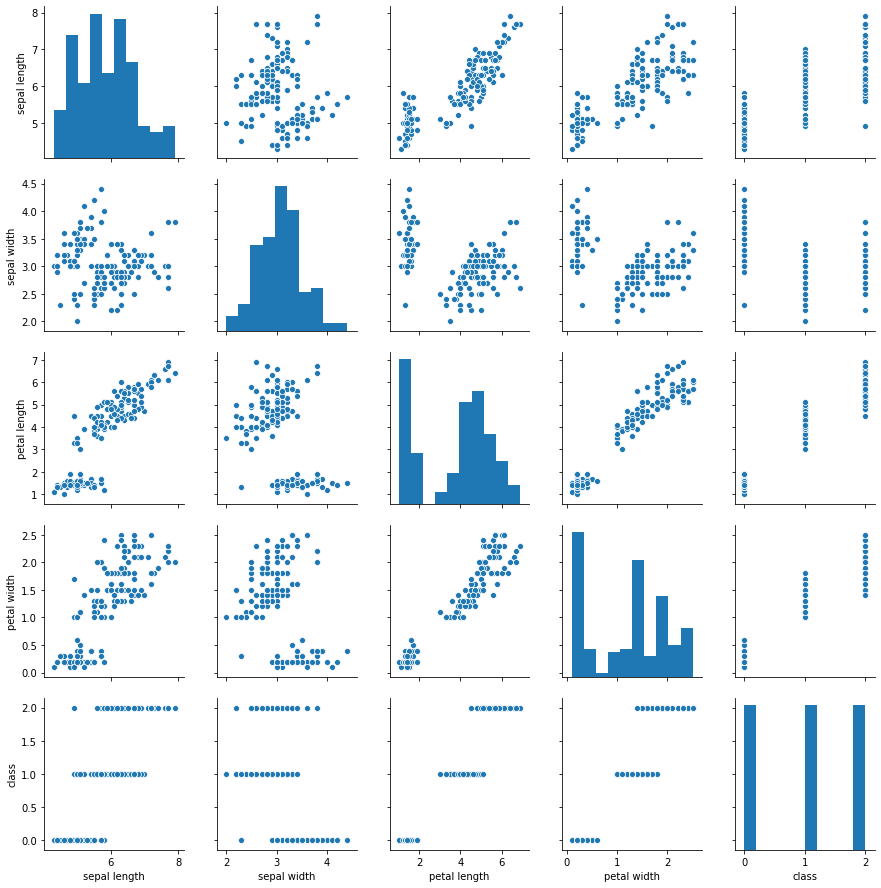

In [106]:
import seaborn as sns
sns.pairplot(data)#看class与各特征的关系看最后一行

模型构建

In [107]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [109]:
type(X_train)

pandas.core.frame.DataFrame

In [110]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\LENOVO\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
y_train_pred=logreg.predict_proba(X_train)
y_train_pred_class=logreg.predict(X_train)

In [122]:
y_train_pred.shape

(112, 3)

模型检验

分类型模型检验一：混淆矩阵可视化

In [128]:
cm=pd.crosstab(y_train_pred_class,y_train)

Text(33.0, 0.5, 'predict')

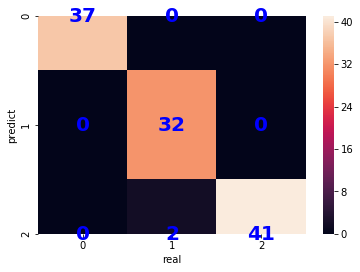

In [140]:
sns.heatmap(cm,annot=True,annot_kws={'size':20,'weight':'bold', 'color':'blue'})
plt.xlabel('real')
plt.ylabel('predict')

In [132]:
print('模型训练集的准确率为：\n',metrics.accuracy_score(y_train,y_train_pred_class))
print('模型训练集的评估报告为：\n',metrics.classification_report(y_train,y_train_pred_class))

模型训练集的准确率为：
 0.9821428571428571
模型训练集的评估报告为：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.94      0.97        34
           2       0.95      1.00      0.98        41

    accuracy                           0.98       112
   macro avg       0.98      0.98      0.98       112
weighted avg       0.98      0.98      0.98       112



In [142]:
41/43,32/34

(0.9534883720930233, 0.9411764705882353)

precision表示正确预测某类别的样本量/该类别的预测样本个数
recall表示正确预测某类别的样本量/该类别的实际样本个数

分类型模型检验二：ROC曲线,只能用与两分类

In [133]:
y_test_class=logreg.predict(X_test)

In [135]:
metrics.accuracy_score(y_test, y_test_class)

0.9736842105263158

Text(33.0, 0.5, 'predict')

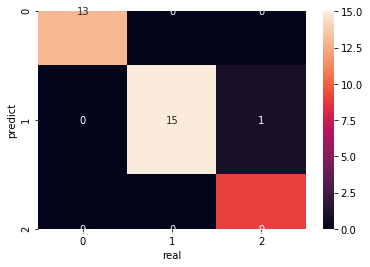

In [137]:
cm1=metrics.confusion_matrix(y_test, y_test_class)
sns.heatmap(cm1,annot=True)
plt.xlabel('real')
plt.ylabel('predict')